In [78]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import auc

In [147]:
#reading data
train = pd.read_csv('train_data.csv', index_col=0)
test = pd.read_csv('test_data.csv', index_col=0)
var_desription = pd.read_csv('VariableDescription.csv') 

In [148]:
var_desription

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


## Explanatory Analysis

In [149]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
Customer Id,,,,,,,,,,,,,
H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [150]:
train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [185]:
train.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

Text(0.5, 1.0, 'Number of claims')

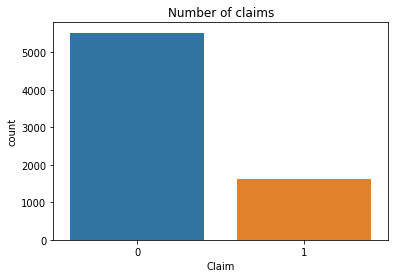

In [151]:
sns.countplot(data=train, x='Claim').set_title('Number of claims')

Text(0.5, 1.0, 'Claim w.r.t Building_Painted')

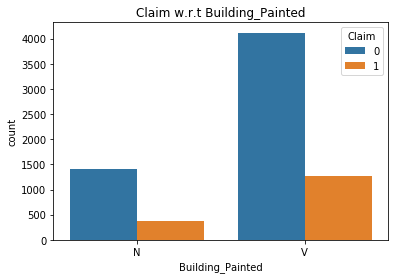

In [152]:
sns.countplot(data=train, x='Building_Painted', hue='Claim').set_title('Claim w.r.t Building_Painted')

Text(0.5, 1.0, 'Claim w.r.t Building_Fenced')

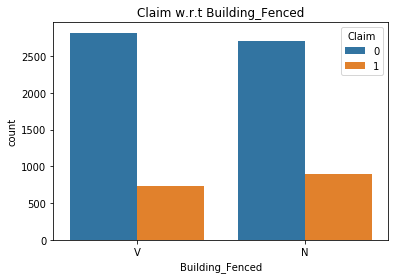

In [153]:
sns.countplot(data=train, x='Building_Fenced',hue='Claim').set_title('Claim w.r.t Building_Fenced')

Text(0.5, 1.0, 'Claim w.r.t Garden')

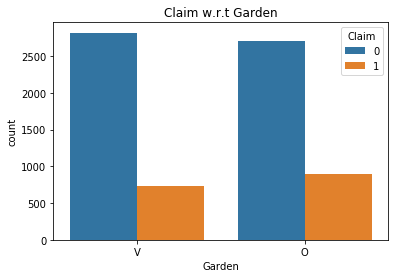

In [154]:
sns.countplot(data=train, x='Garden',hue='Claim').set_title('Claim w.r.t Garden')

Text(0.5, 1.0, 'Claim w.r.t Settlement')

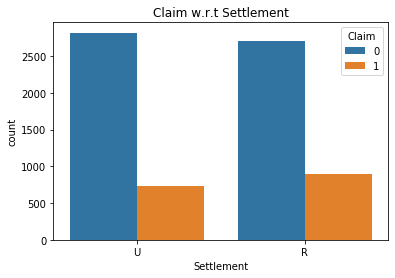

In [155]:
sns.countplot(data=train, x='Settlement', hue='Claim').set_title('Claim w.r.t Settlement')

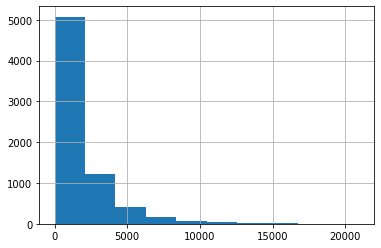

In [156]:
train['Building Dimension'].hist()

In [157]:
#train['Geo_Code'].hist()

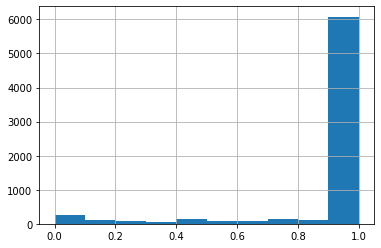

In [158]:
train['Insured_Period'].hist()

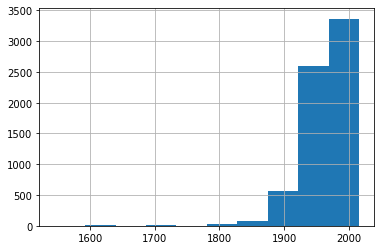

In [159]:
train['Date_of_Occupancy'].hist()

In [160]:
pd.crosstab(index = train['Building_Type'],columns = train['Claim'] )

Claim,0,1
Building_Type,,
1,1412,304
2,2593,712
3,919,311
4,602,307


In [161]:
pd.crosstab(index=train['NumberOfWindows'], columns=train['Claim'])

Claim,0,1
NumberOfWindows,,
.,2819,732
1,68,7
2,323,40
3,713,131
4,717,222
5,447,192
6,201,105
7,121,90
8,61,55


# Comments
#### - 23% of the customers had at least one claim over the insured period
#### - building type 2 had more customers with at least one claim, 44% of the customers who claimed 
#### -

In [162]:
train.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [163]:
train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].mean())
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(1960)
train['Geo_Code'] = train['Geo_Code'].fillna(6088)
train['Garden'] = train['Garden'].fillna('O')

In [164]:
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].mean())
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(1960)
test['Geo_Code'] = test['Geo_Code'].fillna(6088)
test['Garden'] = test['Garden'].fillna('O')

In [165]:
encorder = LabelEncoder()
train['Building_Painted'] = encorder.fit_transform(train['Building_Painted'])
train['Building_Fenced'] = encorder.fit_transform(train['Building_Fenced'])
train['Garden'] = encorder.fit_transform(train['Garden'])
train['Settlement'] = encorder.fit_transform(train['Settlement'])
train['NumberOfWindows'] = pd.get_dummies(train['NumberOfWindows'],columns = 'NumberOfWindows' )
train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())

In [166]:
test['Building_Painted'] = encorder.fit_transform(test['Building_Painted'])
test['Building_Fenced'] = encorder.fit_transform(test['Building_Fenced'])
test['Garden'] = encorder.fit_transform(test['Garden'])
test['Settlement'] = encorder.fit_transform(test['Settlement'])
test['NumberOfWindows'] = pd.get_dummies(test['NumberOfWindows'],columns = 'NumberOfWindows' )
test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [167]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
Customer Id,,,,,,,,,,,,,
H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,1,5,0
H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,0,5,0
H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,1,5,0
H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,1,5,0
H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,0,5,0


In [168]:
test.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
Customer Id,,,,,,,,,,,,
H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0,0,3
H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0,0,3
H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,1,3
H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0,0,2
H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0,0,2


## Model Building

In [171]:
X = train.drop('Claim', axis=1)
y = train.Claim

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [173]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1,
                              depth=4,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                              allow_writing_files=False)

In [174]:
model.fit(X_train, y_train, eval_set=(X_test,y_test))

0:	test: 0.6457291	best: 0.6457291 (0)	total: 8.4ms	remaining: 8.39s
20:	test: 0.7250132	best: 0.7250132 (20)	total: 146ms	remaining: 6.79s
40:	test: 0.7247981	best: 0.7250132 (20)	total: 284ms	remaining: 6.65s
60:	test: 0.7223407	best: 0.7250132 (20)	total: 399ms	remaining: 6.14s
80:	test: 0.7209740	best: 0.7250132 (20)	total: 527ms	remaining: 5.98s
100:	test: 0.7205951	best: 0.7250132 (20)	total: 643ms	remaining: 5.72s
120:	test: 0.7184661	best: 0.7250132 (20)	total: 780ms	remaining: 5.66s
140:	test: 0.7177367	best: 0.7250132 (20)	total: 895ms	remaining: 5.45s
160:	test: 0.7176181	best: 0.7250132 (20)	total: 1.03s	remaining: 5.36s
180:	test: 0.7139302	best: 0.7250132 (20)	total: 1.16s	remaining: 5.23s
200:	test: 0.7145809	best: 0.7250132 (20)	total: 1.3s	remaining: 5.18s
220:	test: 0.7142029	best: 0.7250132 (20)	total: 1.42s	remaining: 5s
240:	test: 0.7137461	best: 0.7250132 (20)	total: 1.55s	remaining: 4.88s
260:	test: 0.7121598	best: 0.7250132 (20)	total: 1.67s	remaining: 4.72s
280

In [175]:
preds = model.predict(test)

In [179]:
submission_formart = pd.read_csv('sample_submission.csv', index_col=0)

In [180]:
my_submission = pd.DataFrame(data=preds, columns = submission_formart.columns, index = test.index)

In [181]:
my_submission.head()

,Claim
Customer Id,
H11920,0.0
H11921,0.0
H9805,0.0
H7493,0.0
H7494,0.0


In [183]:
my_submission.to_csv('sub3.csv')